In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pickle, os
from parameters import *

In [13]:
folder_name = 'intensity 0.03, length 10000, mode pso, kkt True/'

file_name = os.path.abspath('.')+ '/' +folder_name + 'finished tasks.pkl'
with open(file_name,'rb') as file:
    finsih_logs  = pickle.loads(file.read())
print(len(finsih_logs))

581


intensity 0.03, length 10000, mode pso, kkt False
intensity 0.03, length 10000, mode pso, kkt True
intensity 0.03, length 10000, mode least, kkt True
intensity 0.03, length 10000, mode fpsomr, kkt True


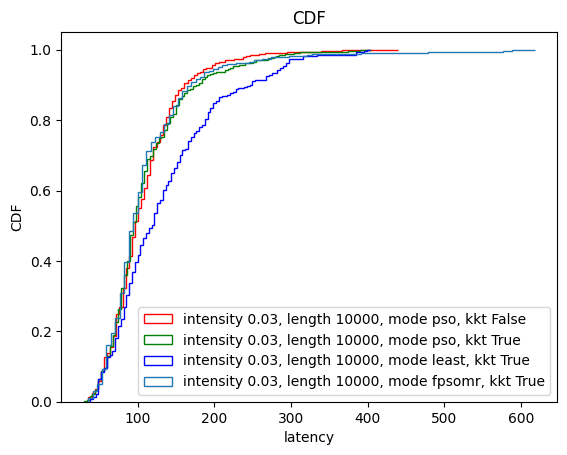

In [99]:
file_name = os.path.abspath('.')+ '/' +folder_name + 'finished tasks.pkl'
latency = []
folder_list = os.listdir(os.getcwd())
fig, ax = plt.subplots()
color_list = ['r', 'g','b', 'C0', 'blac']
i = 0
for f in folder_list:
    if f.find('intensity 0.03, length 10000') != -1:
        if f.find('base') != -1:
            continue
        file_name = os.path.abspath('.')+ '/' +f + '/ego vehicle latency cdf.pkl'
        print(f)
        with open(file_name,'rb') as file:
            latency.append(pickle.loads(file.read()))
        ax.hist(np.array(latency[i]), bins=100,cumulative=True, density=True, histtype='step',  color=color_list[i], label=f)
        i+=1
            
# ax.hist(np.array(latency[1]), bins=100,cumulative=True, density=True, histtype='step',  color='r', label='least')
# ax.hist(np.array(latency[2]), bins=100,cumulative=True, density=True, histtype='step',  color='b', label='base')
# ax.hist(np.array(latency[3]), bins=100,cumulative=True, density=True, histtype='step',  color='g', label='fpsomr')
ax.legend(loc='lower right')
fix_hist_step_vertical_line_at_end(ax)
ax.set_title('CDF')
ax.set_xlabel('latency')
ax.set_ylabel("CDF")
plt.show()

intensity 0.05, length 10000, mode least, kkt False
intensity 0.05, length 10000, mode pso, kkt True
intensity 0.05, length 10000, mode fpsomr, kkt False


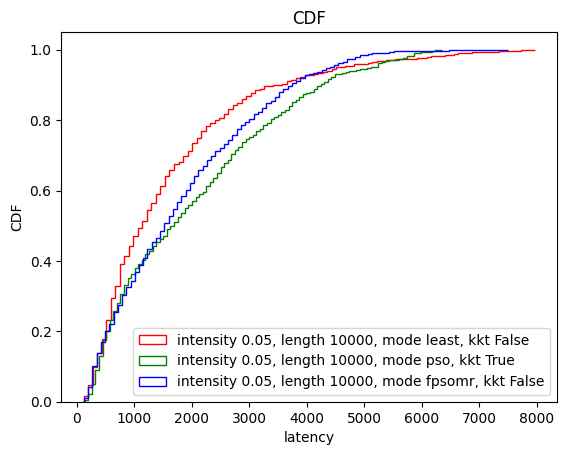

In [105]:
file_name = os.path.abspath('.')+ '/' +folder_name + 'finished tasks.pkl'
latency = []
folder_list = os.listdir(os.getcwd())
fig, ax = plt.subplots()
color_list = ['r', 'g','b', 'C0']
i = 0
for f in folder_list:
    if f.find('intensity 0.05, length 10000') != -1:
        if f.find('base') != -1:
            continue
        file_name = os.path.abspath('.')+ '/' +f + '/ego vehicle latency cdf.pkl'
        print(f)
        with open(file_name,'rb') as file:
            latency.append(pickle.loads(file.read()))
        ax.hist(np.array(latency[i]), bins=100,cumulative=True, density=True, histtype='step',  color=color_list[i], label=f)
        i+=1
            
# ax.hist(np.array(latency[1]), bins=100,cumulative=True, density=True, histtype='step',  color='r', label='least')
# ax.hist(np.array(latency[2]), bins=100,cumulative=True, density=True, histtype='step',  color='b', label='base')
# ax.hist(np.array(latency[3]), bins=100,cumulative=True, density=True, histtype='step',  color='g', label='fpsomr')
ax.legend(loc='lower right')
fix_hist_step_vertical_line_at_end(ax)
ax.set_title('CDF')
ax.set_xlabel('latency')
ax.set_ylabel("CDF")
plt.show()

intensity 0.07, length 10000, mode fpsomr, kkt True
intensity 0.07, length 10000, mode least, kkt True
intensity 0.07, length 10000, mode pso, kkt True


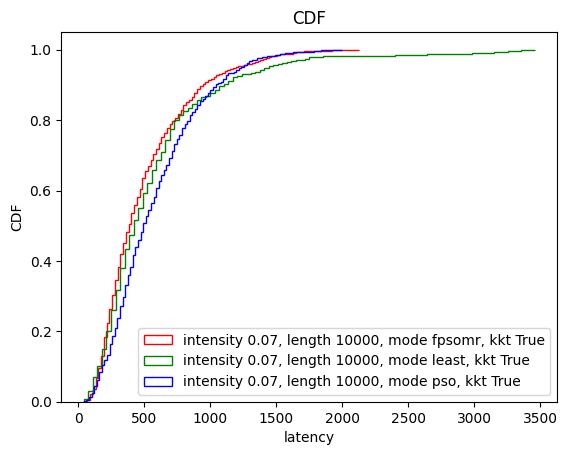

In [97]:
file_name = os.path.abspath('.')+ '/' +folder_name + 'finished tasks.pkl'
latency = []
folder_list = os.listdir(os.getcwd())
fig, ax = plt.subplots()
color_list = ['r', 'g','b', 'C0']
i = 0
for f in folder_list:
    if f.find('intensity 0.07, length 10000') != -1:
        if f.find('base') != -1:
            continue
        file_name = os.path.abspath('.')+ '/' +f + '/ego vehicle latency cdf.pkl'
        print(f)
        with open(file_name,'rb') as file:
            latency.append(pickle.loads(file.read()))
        ax.hist(np.array(latency[i]), bins=100,cumulative=True, density=True, histtype='step',  color=color_list[i], label=f)
        i+=1
            
# ax.hist(np.array(latency[1]), bins=100,cumulative=True, density=True, histtype='step',  color='r', label='least')
# ax.hist(np.array(latency[2]), bins=100,cumulative=True, density=True, histtype='step',  color='b', label='base')
# ax.hist(np.array(latency[3]), bins=100,cumulative=True, density=True, histtype='step',  color='g', label='fpsomr')
ax.legend(loc='lower right')
fix_hist_step_vertical_line_at_end(ax)
ax.set_title('CDF')
ax.set_xlabel('latency')
ax.set_ylabel("CDF")
plt.show()

intensity 0.075, length 10000, mode pso, kkt True
intensity 0.075, length 10000, mode fpsomr, kkt True
intensity 0.075, length 10000, mode least, kkt True


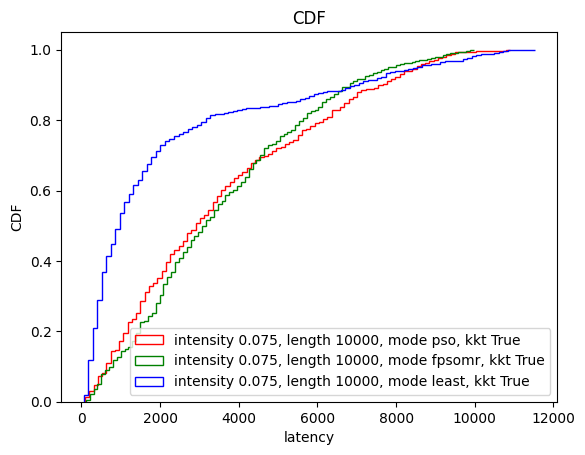

In [102]:
file_name = os.path.abspath('.')+ '/' +folder_name + 'finished tasks.pkl'
latency = []
folder_list = os.listdir(os.getcwd())
fig, ax = plt.subplots()
color_list = ['r', 'g','b', 'C0']
i = 0
for f in folder_list:
    if f.find('intensity 0.075, length 10000') != -1:
        if f.find('base') != -1:
            continue
        file_name = os.path.abspath('.')+ '/' +f + '/ego vehicle latency cdf.pkl'
        print(f)
        with open(file_name,'rb') as file:
            latency.append(pickle.loads(file.read()))
        ax.hist(np.array(latency[i]), bins=100,cumulative=True, density=True, histtype='step',  color=color_list[i], label=f)
        i+=1
            
# ax.hist(np.array(latency[1]), bins=100,cumulative=True, density=True, histtype='step',  color='r', label='least')
# ax.hist(np.array(latency[2]), bins=100,cumulative=True, density=True, histtype='step',  color='b', label='base')
# ax.hist(np.array(latency[3]), bins=100,cumulative=True, density=True, histtype='step',  color='g', label='fpsomr')
ax.legend(loc='lower right')
fix_hist_step_vertical_line_at_end(ax)
ax.set_title('CDF')
ax.set_xlabel('latency')
ax.set_ylabel("CDF")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


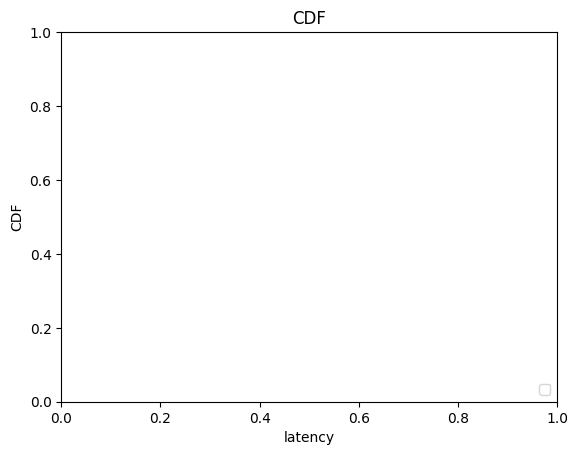

In [104]:
file_name = os.path.abspath('.')+ '/' +folder_name + 'finished tasks.pkl'
latency = []
folder_list = os.listdir(os.getcwd())
fig, ax = plt.subplots()
color_list = ['r', 'g','b', 'C0']
i = 0
for f in folder_list:
    if f.find('intensity 0.1, length 10000') != -1:
        if f.find('base') != -1:
            continue
        file_name = os.path.abspath('.')+ '/' +f + '/ego vehicle latency cdf.pkl'
        print(f)
        with open(file_name,'rb') as file:
            latency.append(pickle.loads(file.read()))
        ax.hist(np.array(latency[i]), bins=100,cumulative=True, density=True, histtype='step',  color=color_list[i], label=f)
        i+=1
ax.legend(loc='lower right')
fix_hist_step_vertical_line_at_end(ax)
ax.set_title('CDF')
ax.set_xlabel('latency')
ax.set_ylabel("CDF")
plt.show()

intensity 0.07, length 10000, mode fpsomr, kkt True
intensity 0.07, length 10000, mode least, kkt True
intensity 0.07, length 10000, mode pso, kkt True


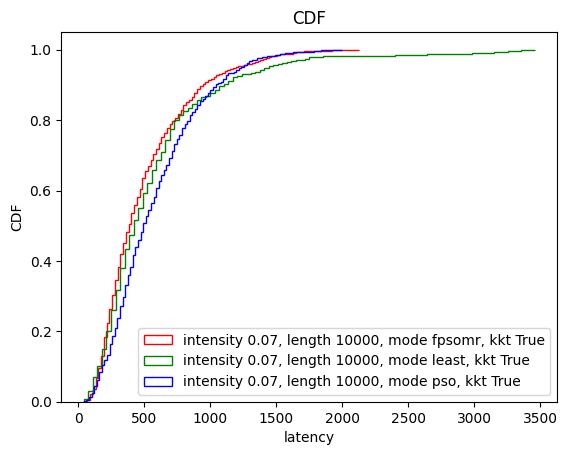

In [82]:
file_name = os.path.abspath('.')+ '/' +folder_name + 'finished tasks.pkl'
latency = []
folder_list = os.listdir(os.getcwd())
fig, ax = plt.subplots()
color_list = ['r', 'g','b', 'C0']
i = 0
for f in folder_list:
    if f.find('intensity 0.07, length 10000') != -1:
        if f.find('base') != -1:
            continue
        file_name = os.path.abspath('.')+ '/' +f + '/ego vehicle latency cdf.pkl'
        print(f)
        with open(file_name,'rb') as file:
            latency.append(pickle.loads(file.read()))
        ax.hist(np.array(latency[i]), bins=100,cumulative=True, density=True, histtype='step',  color=color_list[i], label=f)
        i+=1
ax.legend(loc='lower right')
fix_hist_step_vertical_line_at_end(ax)
ax.set_title('CDF')
ax.set_xlabel('latency')
ax.set_ylabel("CDF")
plt.show()

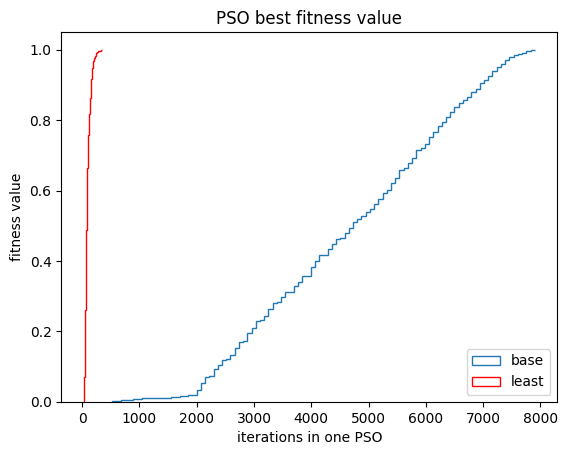

In [39]:
folder_list
file_name = os.path.abspath('.')+ '/intensity 0.03, length 60000, mode base, kkt True/ego vehicle latency cdf.pkl'
with open(file_name,'rb') as file:
    base_time  = pickle.loads(file.read())
    
file_name = os.path.abspath('.')+ '/intensity 0.03, length 60000, mode least, kkt True/ego vehicle latency cdf.pkl'
finsih_log = []
with open(file_name,'rb') as file:
    least_time  = pickle.loads(file.read())
    
fig, ax = plt.subplots()
ax.hist(np.array(base_time), bins=100,cumulative=True, density=True, histtype='step',  color='C0', label='base')
ax.hist(np.array(least_time), bins=100,cumulative=True, density=True, histtype='step',  color='r', label='least')
ax.legend(loc='lower right')
fix_hist_step_vertical_line_at_end(ax)
ax.set_title('PSO best fitness value')
ax.set_xlabel('iterations in one PSO')
ax.set_ylabel("fitness value")
plt.show()


In [ ]:
plt_size = 8
fig, ax = plt.subplots(2, 2, figsize=(2*plt_size,plt_size))
plt.suptitle('Possion Distribution density = %s' %(args.ego_poisson_density))

# TODO
# draw downlink, uplink

ax1 = ax[0,0]
ax1.hist(np.array(env.stats['ego_v_latency']), bins=100,cumulative=True, density=True, histtype='step',  color='C0',)
fix_hist_step_vertical_line_at_end(ax1)
ax1.set_title('CDF of time latency')
ax1.set_xlabel('latency')
ax1.set_ylabel("CDF")


In [55]:
help(plt)

Help on module matplotlib.pyplot in matplotlib:

NAME
    matplotlib.pyplot

DESCRIPTION
    `matplotlib.pyplot` is a state-based interface to matplotlib. It provides
    an implicit,  MATLAB-like, way of plotting.  It also opens figures on your
    screen, and acts as the figure GUI manager.

    pyplot is mainly intended for interactive plots and simple cases of
    programmatic plot generation::

        import numpy as np
        import matplotlib.pyplot as plt

        x = np.arange(0, 5, 0.1)
        y = np.sin(x)
        plt.plot(x, y)

    The explicit object-oriented API is recommended for complex plots, though
    pyplot is still usually used to create the figure and often the axes in the
    figure. See `.pyplot.figure`, `.pyplot.subplots`, and
    `.pyplot.subplot_mosaic` to create figures, and
    :doc:`Axes API </api/axes_api>` for the plotting methods on an Axes::

        import numpy as np
        import matplotlib.pyplot as plt

        x = np.arange(0, 5, 0.1)
      